In [1]:
# IMPORTING PACKAGES
# ------------------------------------------------------
import pandas as pd
import numpy as np
import os
import re
import warnings

# VISUALIZATION
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 0
pd.options.display.max_colwidth =20

# CONFIGURATIONS
# ------------------------------------------------------
warnings.filterwarnings("ignore")

# MODEL CONFIG
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
os.chdir("data")

In [3]:
df = pd.read_csv("CleanedData.csv")

In [4]:
dx = pd.read_csv("Products.csv")
to_keep = dx["name"]
df = df[df['Name'].isin(to_keep)]

In [5]:
df["Category_name"].value_counts()

tv, television, led                1919
tv, 4k, television                 1475
camera, shoot, point               1167
headphone                          1119
drive, storage, hard                966
tablet, computer, ipad              841
camera, mirrorless                  840
sound, speaker, home                786
headphone, earbud, bluetooth        738
speaker, portable, bluetooth        729
receiver, amplifier, home           697
car, gps, dash                      670
car, speaker, subwoofer             652
player, ipod                        596
phone, cell                         518
monitor, computer                   407
speaker, audio                      373
laptop, computer                    358
networking, modem, router           350
case, computer                      341
lens, camera                        340
networking, adapter, switch         269
camera, camcorder, action           267
smart, home, automation             264
speaker, bluetooth, mobile          254


## Price Elasticity for all Products.

In [6]:
df["Year"].value_counts()

2017    16458
2018     3883
2016      254
2015      204
2014        6
Name: Year, dtype: int64

In [7]:
#dfx = df[df["Category_name"].str.contains("speaker",case=False)]
dfx= df[(df["Year"]==2017) | (df["Year"]==2018)]

In [8]:
dfx = dfx.reset_index(drop=True)

In [9]:
dfx.sort_values(by=['Date'],ignore_index=True)

,id,Name,Brand,Description,Category_name,Merchant,Actual_price,Discount_price,isSale,Discount_per,Imp_count,Day,Month,Year,Week,Month_Name,Day_Name,Year_Month,Year_Week,Date
0,AVpfWOIFLJeJML43...,Alpine - UTE - A...,Alpine,"Electronics,Home...","car, gps, dash",Walmart.com,137.99,137.99,No,0.0,1,7,1,2017,1,January,Saturday,2017-01,"2017,01",2017-01-07
1,AVpflKqwLJeJML43...,LG Electronics O...,LG,"4K Ultra HD TVs,...","tv, 4k, television",Walmart.com,4997.00,4997.00,No,0.0,1,8,1,2017,1,January,Sunday,2017-01,"2017,01",2017-01-08
2,AVphibxI1cnluZ0-...,Magellan Roadmat...,Magellan,"Electronics,GPS ...","car, gps, dash",Walmart.com,199.49,199.49,No,0.0,1,8,1,2017,1,January,Sunday,2017-01,"2017,01",2017-01-08
3,AVphAiVC1cnluZ0-...,Razer Kraken Pro...,Razer,"Computers,Office...","headset, game, c...",Walmart.com,96.43,96.43,No,0.0,1,14,1,2017,2,January,Saturday,2017-01,"2017,02",2017-01-14
4,AVphibxI1cnluZ0-...,Magellan Roadmat...,Magellan,"Electronics,GPS ...","car, gps, dash",Walmart.com,99.99,99.99,No,0.0,1,20,1,2017,3,January,Friday,2017-01,"2017,03",2017-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20336,AVpivePGilAPnD_x...,The Rebel BT On-...,House of Marley,"Headphones,Bluet...","headphone, earbu...",bhphotovideo.com,36.99,36.99,No,0.0,2,25,7,2018,30,July,Wednesday,2018-07,"2018,30",2018-07-25
20337,AVpfIODe1cnluZ0-...,Cyber-shot DSC-W...,Sony,"Digital Cameras,...","camera, shoot, p...",bhphotovideo.com,198.00,198.00,No,0.0,15,25,7,2018,30,July,Wednesday,2018-07,"2018,30",2018-07-25
20338,AV1YDsmoGV-KLJ3a...,Alpha a5100 Mirr...,Sony,"Digital Cameras,...","camera, mirrorless",bhphotovideo.com,548.00,548.00,No,0.0,13,25,7,2018,30,July,Wednesday,2018-07,"2018,30",2018-07-25
20339,AVphe2VKilAPnD_x...,Reference Premie...,Klipsch,"Stereos,TV, Vide...","speaker, center,...",bhphotovideo.com,549.00,549.00,No,0.0,14,25,7,2018,30,July,Wednesday,2018-07,"2018,30",2018-07-25


In [10]:
#Grouping data by Name and Week number.
dfx_mod = dfx.groupby(['Name', "Year_Month"]).agg({'Discount_per':'mean',
                                                   'Discount_price':'mean',
                                                   'Imp_count':'sum',
                                                   "Category_name":lambda x: pd.Series.mode(x)[0],
                                                   "Date":lambda x: pd.Series.mode(x)[0]}).reset_index()


In [11]:
#Rearranging
dfx_mod = dfx_mod[["Name","Category_name","Discount_per",'Discount_price',"Imp_count","Year_Month","Date"]]

In [12]:
dfx_mod['Date']= pd.to_datetime(dfx_mod['Date'])

In [13]:

dfx_mod.sort_values("Year_Month",ignore_index=True)

,Name,Category_name,Discount_per,Discount_price,Imp_count,Year_Month,Date
0,LG Electronics O...,"tv, 4k, television",0.0,4997.0000,1,2017-01,2017-01-08
1,V-MODA XS On-Ear...,headphone,0.0,159.9900,2,2017-01,2017-01-27
2,Magellan Roadmat...,"car, gps, dash",0.0,132.6925,4,2017-01,2017-01-20
3,PMX840BT Bluetoo...,"microphone, musi...",0.0,223.1700,2,2017-01,2017-01-26
4,Alpine - UTE - A...,"car, gps, dash",0.0,137.9900,1,2017-01,2017-01-07
...,...,...,...,...,...,...,...
4296,JBL Clip2 Portab...,"speaker, portabl...",0.0,59.9500,18,2018-07,2018-07-06
4297,Alpha a6000 Mirr...,"camera, mirrorless",0.0,996.0000,7,2018-07,2018-07-25
4298,Cyber-shot DSC-R...,"camera, shoot, p...",0.0,998.0000,21,2018-07,2018-07-25
4299,Cyber-shot DSC-W...,"camera, shoot, p...",0.0,198.0000,15,2018-07,2018-07-25


#### X-Values = PRICE

In [14]:

#New X dataframe.
x_new = dfx_mod.pivot(index="Year_Month", columns='Name' ,values='Discount_per')
print("Structure of DataFrame = ",x_new.shape)
x_new.shape

Structure of DataFrame =  (19, 424)


(19, 424)

In [15]:
x_new.head()

Name,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,1500-Watt Digital Infrared Heater with Wi-Fi Phone App - White,1506TSA Lock,"2) New Kicker 41KSC6934 6x9 3-Way 300 Watt Car Audio Coaxial Speakers KSC693""",22 Widescreen Full HD 1080p LED Monitor,32GB High Speed UHS-I SDHC U3 Memory Card (Class 10),391 Series C32F391 32 16:9 Curved FreeSync LCD Monitor,3TB AirPort Time Capsule (5th Generation),450 Mbps 2.4/5GHz Wireless N Dual Band PCI Express Adapter,4K Video Camera,4TB My Book Desktop USB 3.0 External Hard Drive,"4TB Network OEM HDD Retail Kit (8-Pack, WD40EFRX, Red Drives)","7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",7.2CH AVR WITH WIFI _ BLUETOOTH 2 HDMI OUTPUTS 90 WATTS/CH.,AF-S NIKKOR 85mm f/1.8G Lens,"AOC - 18.5 LED Monitor - Black""",AVR-S530BT 5.2-Channel A/V Receiver,AVR-S730H 7.2-Channel Network A/V Receiver,AVR-X2400H 7.2-Channel Network A/V Receiver,AVR-X3400H 7.2-Channel Network A/V Receiver,Acer 15.6 Chromebook CB5-571-C4G4,Acer Predator G1-710 Desktop Computer - Intel Core i7-6700 3.4 GHz - 16 GB DDR4 SDRAM - 2 TB HDD + 512 GB SSD,Actiontec 300 Mbps Wireless-N ADSL Modem Router (GT784WN),Adventura SH 140 II Shoulder Bag (Black),Aeon 58.3 x 104.1 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,Aeon 71.5 x 130.9 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,AfterShokz Trekz Titanium Wireless Headphones,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,"Alpine - 5 x 7"" 2-Way Coaxial Car Speakers with Poly-Mica Cones (Pair) - Black""","Alpine - 6-1/2 2-Way Component Car Speakers with Poly-Mica Cones (Pair) - Black""",Alpine - UTE - Apple iPod- and Satellite Radio-Ready - In-Dash Receiver - Black,Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - Smart Cover for Apple iPad and iPad® Air 2 - Charcoal Gray,Apple - iPod touch® 32GB MP3 Player - Space Gray,...,V-MODA - CROSSFADE M-100 Over-the-Ear Headphones - Shadow,V-MODA - Crossfade 2 Wireless Over-the-Ear Headphones - Rose gold,V-MODA - Crossfade Wireless Headphones - Gunmetal Black,V-MODA Crossfade Wireless Over-Ear Headphones - Phantom Chrome,V-MODA XS On-Ear Folding Design Noise-Isolating Metal Headphone (Matte Black Metal),V206HQL Abd 19.5 LED Backlit LCD Monitor (Black),VG939SM 19 Ergonomic LED LCD Multimedia Display,"VIZIO - 50 Class - LED - M-Series - 2160p - Smart - Home Theater Display with HDR""","VIZIO 39 Class FHD (1080P) Smart LED TV (D39f-E1)""",VIZIO M-Series 70” SmartCast 2160p 4K XHDR Plus XLED Plus Display (M70-D3),VPL-HW45ES Full HD Home Theater Projector (Black),VS278Q-P 27 16:9 LCD Monitor,VXi - BlueParrott B450-XT Bluetooth Headset - Black,Versavu Classic 360 Case for Apple iPad Air,"ViewSonic - 21.5 LED HD Monitor - Black""",Viper 7153V 1-Way 5-Button SuperCode Replacement Remote for 5701,Virgin Mobile - LG Stylo™ 3 4G LTE with 16GB Memory Prepaid Cell Phone - Gray,Vizio 38 5.1 Sound Bar System - Black (sb3851-C0),W650D-Series 48-Class Full HD Smart LED TV,WD - My Book 6TB External USB 3.0 Hard Drive - Black,WD - My Passport X 3TB External USB 3.0 Portable Hard Drive - Black,Wireless HD Digital Kit,XB550AP EXTRA BASS Headphones (Black),XB80BS Extra Bass Sports In-Ear Bluetooth Headphones (Black),XBR-X850E-Series 75-Class HDR UHD Smart LED TV,YU2 Powered Desktop Speakers (Glossy Red),ZS-RS60BT CD Boombox,ZTE Warp Elite No Contract Phone - Retail Packaging - Boost,Zoom - H1 Handy Recorder - Black,e1659Fwu 16 Widescreen USB 3.1 Gen 1 Powered LED Backlit LCD Monitor,fr Case for Galaxy S7 (Black),iHome iBN43BC Bluetooth Ster

In [16]:
# FOR X VALUES
#Filling missing values with fillna + forward filling
x_new_ = pd.DataFrame(x_new.to_records())
x_new_.fillna(method='ffill', inplace=True)
x_new_.fillna(method='bfill', inplace=True)
x_new_.head()

,Year_Month,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,1500-Watt Digital Infrared Heater with Wi-Fi Phone App - White,1506TSA Lock,"2) New Kicker 41KSC6934 6x9 3-Way 300 Watt Car Audio Coaxial Speakers KSC693""",22 Widescreen Full HD 1080p LED Monitor,32GB High Speed UHS-I SDHC U3 Memory Card (Class 10),391 Series C32F391 32 16:9 Curved FreeSync LCD Monitor,3TB AirPort Time Capsule (5th Generation),450 Mbps 2.4/5GHz Wireless N Dual Band PCI Express Adapter,4K Video Camera,4TB My Book Desktop USB 3.0 External Hard Drive,"4TB Network OEM HDD Retail Kit (8-Pack, WD40EFRX, Red Drives)","7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",7.2CH AVR WITH WIFI _ BLUETOOTH 2 HDMI OUTPUTS 90 WATTS/CH.,AF-S NIKKOR 85mm f/1.8G Lens,"AOC - 18.5 LED Monitor - Black""",AVR-S530BT 5.2-Channel A/V Receiver,AVR-S730H 7.2-Channel Network A/V Receiver,AVR-X2400H 7.2-Channel Network A/V Receiver,AVR-X3400H 7.2-Channel Network A/V Receiver,Acer 15.6 Chromebook CB5-571-C4G4,Acer Predator G1-710 Desktop Computer - Intel Core i7-6700 3.4 GHz - 16 GB DDR4 SDRAM - 2 TB HDD + 512 GB SSD,Actiontec 300 Mbps Wireless-N ADSL Modem Router (GT784WN),Adventura SH 140 II Shoulder Bag (Black),Aeon 58.3 x 104.1 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,Aeon 71.5 x 130.9 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,AfterShokz Trekz Titanium Wireless Headphones,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,"Alpine - 5 x 7"" 2-Way Coaxial Car Speakers with Poly-Mica Cones (Pair) - Black""","Alpine - 6-1/2 2-Way Component Car Speakers with Poly-Mica Cones (Pair) - Black""",Alpine - UTE - Apple iPod- and Satellite Radio-Ready - In-Dash Receiver - Black,Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - Smart Cover for Apple iPad and iPad® Air 2 - Charcoal Gray,...,V-MODA - CROSSFADE M-100 Over-the-Ear Headphones - Shadow,V-MODA - Crossfade 2 Wireless Over-the-Ear Headphones - Rose gold,V-MODA - Crossfade Wireless Headphones - Gunmetal Black,V-MODA Crossfade Wireless Over-Ear Headphones - Phantom Chrome,V-MODA XS On-Ear Folding Design Noise-Isolating Metal Headphone (Matte Black Metal),V206HQL Abd 19.5 LED Backlit LCD Monitor (Black),VG939SM 19 Ergonomic LED LCD Multimedia Display,"VIZIO - 50 Class - LED - M-Series - 2160p - Smart - Home Theater Display with HDR""","VIZIO 39 Class FHD (1080P) Smart LED TV (D39f-E1)""",VIZIO M-Series 70” SmartCast 2160p 4K XHDR Plus XLED Plus Display (M70-D3),VPL-HW45ES Full HD Home Theater Projector (Black),VS278Q-P 27 16:9 LCD Monitor,VXi - BlueParrott B450-XT Bluetooth Headset - Black,Versavu Classic 360 Case for Apple iPad Air,"ViewSonic - 21.5 LED HD Monitor - Black""",Viper 7153V 1-Way 5-Button SuperCode Replacement Remote for 5701,Virgin Mobile - LG Stylo™ 3 4G LTE with 16GB Memory Prepaid Cell Phone - Gray,Vizio 38 5.1 Sound Bar System - Black (sb3851-C0),W650D-Series 48-Class Full HD Smart LED TV,WD - My Book 6TB External USB 3.0 Hard Drive - Black,WD - My Passport X 3TB External USB 3.0 Portable Hard Drive - Black,Wireless HD Digital Kit,XB550AP EXTRA BASS Headphones (Black),XB80BS Extra Bass Sports In-Ear Bluetooth Headphones (Black),XBR-X850E-Series 75-Class HDR UHD Smart LED TV,YU2 Powered Desktop Speakers (Glossy Red),ZS-RS60BT CD Boombox,ZTE Warp Elite No Contract Phone - Retail Packaging - Boost,Zoom - H1 Handy Recorder - Black,e1659Fwu 16 Widescreen USB 3.1 Gen 1 Powered LED Backlit LCD Monitor,fr Case for Galaxy S7 (Black),iHome iBN43BC Bluetooth Stereo Dual Alarm FM Clock Radio and Speakerph

In [17]:
#New F dataframe.

f_new = dfx_mod.pivot(index="Year_Month", columns='Name' ,values='Discount_price')
print("Structure of DataFrame = ",f_new.shape)
f_new.shape
# FOR X VALUES
#Filling missing values with fillna + forward filling
f_new_ = pd.DataFrame(f_new.to_records())
f_new_.fillna(method='ffill', inplace=True)
f_new_.fillna(method='bfill', inplace=True)
f_new_.head()

Structure of DataFrame =  (19, 424)


,Year_Month,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,1500-Watt Digital Infrared Heater with Wi-Fi Phone App - White,1506TSA Lock,"2) New Kicker 41KSC6934 6x9 3-Way 300 Watt Car Audio Coaxial Speakers KSC693""",22 Widescreen Full HD 1080p LED Monitor,32GB High Speed UHS-I SDHC U3 Memory Card (Class 10),391 Series C32F391 32 16:9 Curved FreeSync LCD Monitor,3TB AirPort Time Capsule (5th Generation),450 Mbps 2.4/5GHz Wireless N Dual Band PCI Express Adapter,4K Video Camera,4TB My Book Desktop USB 3.0 External Hard Drive,"4TB Network OEM HDD Retail Kit (8-Pack, WD40EFRX, Red Drives)","7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",7.2CH AVR WITH WIFI _ BLUETOOTH 2 HDMI OUTPUTS 90 WATTS/CH.,AF-S NIKKOR 85mm f/1.8G Lens,"AOC - 18.5 LED Monitor - Black""",AVR-S530BT 5.2-Channel A/V Receiver,AVR-S730H 7.2-Channel Network A/V Receiver,AVR-X2400H 7.2-Channel Network A/V Receiver,AVR-X3400H 7.2-Channel Network A/V Receiver,Acer 15.6 Chromebook CB5-571-C4G4,Acer Predator G1-710 Desktop Computer - Intel Core i7-6700 3.4 GHz - 16 GB DDR4 SDRAM - 2 TB HDD + 512 GB SSD,Actiontec 300 Mbps Wireless-N ADSL Modem Router (GT784WN),Adventura SH 140 II Shoulder Bag (Black),Aeon 58.3 x 104.1 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,Aeon 71.5 x 130.9 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,AfterShokz Trekz Titanium Wireless Headphones,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,"Alpine - 5 x 7"" 2-Way Coaxial Car Speakers with Poly-Mica Cones (Pair) - Black""","Alpine - 6-1/2 2-Way Component Car Speakers with Poly-Mica Cones (Pair) - Black""",Alpine - UTE - Apple iPod- and Satellite Radio-Ready - In-Dash Receiver - Black,Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - Smart Cover for Apple iPad and iPad® Air 2 - Charcoal Gray,...,V-MODA - CROSSFADE M-100 Over-the-Ear Headphones - Shadow,V-MODA - Crossfade 2 Wireless Over-the-Ear Headphones - Rose gold,V-MODA - Crossfade Wireless Headphones - Gunmetal Black,V-MODA Crossfade Wireless Over-Ear Headphones - Phantom Chrome,V-MODA XS On-Ear Folding Design Noise-Isolating Metal Headphone (Matte Black Metal),V206HQL Abd 19.5 LED Backlit LCD Monitor (Black),VG939SM 19 Ergonomic LED LCD Multimedia Display,"VIZIO - 50 Class - LED - M-Series - 2160p - Smart - Home Theater Display with HDR""","VIZIO 39 Class FHD (1080P) Smart LED TV (D39f-E1)""",VIZIO M-Series 70” SmartCast 2160p 4K XHDR Plus XLED Plus Display (M70-D3),VPL-HW45ES Full HD Home Theater Projector (Black),VS278Q-P 27 16:9 LCD Monitor,VXi - BlueParrott B450-XT Bluetooth Headset - Black,Versavu Classic 360 Case for Apple iPad Air,"ViewSonic - 21.5 LED HD Monitor - Black""",Viper 7153V 1-Way 5-Button SuperCode Replacement Remote for 5701,Virgin Mobile - LG Stylo™ 3 4G LTE with 16GB Memory Prepaid Cell Phone - Gray,Vizio 38 5.1 Sound Bar System - Black (sb3851-C0),W650D-Series 48-Class Full HD Smart LED TV,WD - My Book 6TB External USB 3.0 Hard Drive - Black,WD - My Passport X 3TB External USB 3.0 Portable Hard Drive - Black,Wireless HD Digital Kit,XB550AP EXTRA BASS Headphones (Black),XB80BS Extra Bass Sports In-Ear Bluetooth Headphones (Black),XBR-X850E-Series 75-Class HDR UHD Smart LED TV,YU2 Powered Desktop Speakers (Glossy Red),ZS-RS60BT CD Boombox,ZTE Warp Elite No Contract Phone - Retail Packaging - Boost,Zoom - H1 Handy Recorder - Black,e1659Fwu 16 Widescreen USB 3.1 Gen 1 Powered LED Backlit LCD Monitor,fr Case for Galaxy S7 (Black),iHome iBN43BC Bluetooth Stereo Dual Alarm FM Clock Radio and Speakerph

#### Y-Values = DEMAND or IMPRESSIONS

In [18]:
#New Y dataframe.
y_new = dfx_mod.pivot(index='Year_Month', columns='Name', values='Imp_count')
print("Structure of DataFrame = ",y_new.shape)
y_new.shape


Structure of DataFrame =  (19, 424)


(19, 424)

In [19]:
y_new.sample(5)

Name,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,1500-Watt Digital Infrared Heater with Wi-Fi Phone App - White,1506TSA Lock,"2) New Kicker 41KSC6934 6x9 3-Way 300 Watt Car Audio Coaxial Speakers KSC693""",22 Widescreen Full HD 1080p LED Monitor,32GB High Speed UHS-I SDHC U3 Memory Card (Class 10),391 Series C32F391 32 16:9 Curved FreeSync LCD Monitor,3TB AirPort Time Capsule (5th Generation),450 Mbps 2.4/5GHz Wireless N Dual Band PCI Express Adapter,4K Video Camera,4TB My Book Desktop USB 3.0 External Hard Drive,"4TB Network OEM HDD Retail Kit (8-Pack, WD40EFRX, Red Drives)","7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",7.2CH AVR WITH WIFI _ BLUETOOTH 2 HDMI OUTPUTS 90 WATTS/CH.,AF-S NIKKOR 85mm f/1.8G Lens,"AOC - 18.5 LED Monitor - Black""",AVR-S530BT 5.2-Channel A/V Receiver,AVR-S730H 7.2-Channel Network A/V Receiver,AVR-X2400H 7.2-Channel Network A/V Receiver,AVR-X3400H 7.2-Channel Network A/V Receiver,Acer 15.6 Chromebook CB5-571-C4G4,Acer Predator G1-710 Desktop Computer - Intel Core i7-6700 3.4 GHz - 16 GB DDR4 SDRAM - 2 TB HDD + 512 GB SSD,Actiontec 300 Mbps Wireless-N ADSL Modem Router (GT784WN),Adventura SH 140 II Shoulder Bag (Black),Aeon 58.3 x 104.1 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,Aeon 71.5 x 130.9 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,AfterShokz Trekz Titanium Wireless Headphones,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,"Alpine - 5 x 7"" 2-Way Coaxial Car Speakers with Poly-Mica Cones (Pair) - Black""","Alpine - 6-1/2 2-Way Component Car Speakers with Poly-Mica Cones (Pair) - Black""",Alpine - UTE - Apple iPod- and Satellite Radio-Ready - In-Dash Receiver - Black,Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - Smart Cover for Apple iPad and iPad® Air 2 - Charcoal Gray,Apple - iPod touch® 32GB MP3 Player - Space Gray,...,V-MODA - CROSSFADE M-100 Over-the-Ear Headphones - Shadow,V-MODA - Crossfade 2 Wireless Over-the-Ear Headphones - Rose gold,V-MODA - Crossfade Wireless Headphones - Gunmetal Black,V-MODA Crossfade Wireless Over-Ear Headphones - Phantom Chrome,V-MODA XS On-Ear Folding Design Noise-Isolating Metal Headphone (Matte Black Metal),V206HQL Abd 19.5 LED Backlit LCD Monitor (Black),VG939SM 19 Ergonomic LED LCD Multimedia Display,"VIZIO - 50 Class - LED - M-Series - 2160p - Smart - Home Theater Display with HDR""","VIZIO 39 Class FHD (1080P) Smart LED TV (D39f-E1)""",VIZIO M-Series 70” SmartCast 2160p 4K XHDR Plus XLED Plus Display (M70-D3),VPL-HW45ES Full HD Home Theater Projector (Black),VS278Q-P 27 16:9 LCD Monitor,VXi - BlueParrott B450-XT Bluetooth Headset - Black,Versavu Classic 360 Case for Apple iPad Air,"ViewSonic - 21.5 LED HD Monitor - Black""",Viper 7153V 1-Way 5-Button SuperCode Replacement Remote for 5701,Virgin Mobile - LG Stylo™ 3 4G LTE with 16GB Memory Prepaid Cell Phone - Gray,Vizio 38 5.1 Sound Bar System - Black (sb3851-C0),W650D-Series 48-Class Full HD Smart LED TV,WD - My Book 6TB External USB 3.0 Hard Drive - Black,WD - My Passport X 3TB External USB 3.0 Portable Hard Drive - Black,Wireless HD Digital Kit,XB550AP EXTRA BASS Headphones (Black),XB80BS Extra Bass Sports In-Ear Bluetooth Headphones (Black),XBR-X850E-Series 75-Class HDR UHD Smart LED TV,YU2 Powered Desktop Speakers (Glossy Red),ZS-RS60BT CD Boombox,ZTE Warp Elite No Contract Phone - Retail Packaging - Boost,Zoom - H1 Handy Recorder - Black,e1659Fwu 16 Widescreen USB 3.1 Gen 1 Powered LED Backlit LCD Monitor,fr Case for Galaxy S7 (Black),iHome iBN43BC Bluetooth Ster

In [20]:
# FOR Y VALUES
#Filling missing values with fillna + forward filling
y_new_ = pd.DataFrame(y_new.to_records())
y_new_.fillna(method='ffill', inplace=True)
y_new_.fillna(method='bfill', inplace=True)
y_new_.head(5)

,Year_Month,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,1500-Watt Digital Infrared Heater with Wi-Fi Phone App - White,1506TSA Lock,"2) New Kicker 41KSC6934 6x9 3-Way 300 Watt Car Audio Coaxial Speakers KSC693""",22 Widescreen Full HD 1080p LED Monitor,32GB High Speed UHS-I SDHC U3 Memory Card (Class 10),391 Series C32F391 32 16:9 Curved FreeSync LCD Monitor,3TB AirPort Time Capsule (5th Generation),450 Mbps 2.4/5GHz Wireless N Dual Band PCI Express Adapter,4K Video Camera,4TB My Book Desktop USB 3.0 External Hard Drive,"4TB Network OEM HDD Retail Kit (8-Pack, WD40EFRX, Red Drives)","7.0 Tab A 8GB Tablet (Wi-Fi Only, Black)",7.2CH AVR WITH WIFI _ BLUETOOTH 2 HDMI OUTPUTS 90 WATTS/CH.,AF-S NIKKOR 85mm f/1.8G Lens,"AOC - 18.5 LED Monitor - Black""",AVR-S530BT 5.2-Channel A/V Receiver,AVR-S730H 7.2-Channel Network A/V Receiver,AVR-X2400H 7.2-Channel Network A/V Receiver,AVR-X3400H 7.2-Channel Network A/V Receiver,Acer 15.6 Chromebook CB5-571-C4G4,Acer Predator G1-710 Desktop Computer - Intel Core i7-6700 3.4 GHz - 16 GB DDR4 SDRAM - 2 TB HDD + 512 GB SSD,Actiontec 300 Mbps Wireless-N ADSL Modem Router (GT784WN),Adventura SH 140 II Shoulder Bag (Black),Aeon 58.3 x 104.1 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,Aeon 71.5 x 130.9 16:9 Fixed Frame Projection Screen with CineWhite Projection Surface,AfterShokz Trekz Titanium Wireless Headphones,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,"Alpine - 5 x 7"" 2-Way Coaxial Car Speakers with Poly-Mica Cones (Pair) - Black""","Alpine - 6-1/2 2-Way Component Car Speakers with Poly-Mica Cones (Pair) - Black""",Alpine - UTE - Apple iPod- and Satellite Radio-Ready - In-Dash Receiver - Black,Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,Apple - Pre-owned 9.7-inch iPad Pro - 32GB - Space gray,Apple - Smart Cover for Apple iPad and iPad® Air 2 - Charcoal Gray,...,V-MODA - CROSSFADE M-100 Over-the-Ear Headphones - Shadow,V-MODA - Crossfade 2 Wireless Over-the-Ear Headphones - Rose gold,V-MODA - Crossfade Wireless Headphones - Gunmetal Black,V-MODA Crossfade Wireless Over-Ear Headphones - Phantom Chrome,V-MODA XS On-Ear Folding Design Noise-Isolating Metal Headphone (Matte Black Metal),V206HQL Abd 19.5 LED Backlit LCD Monitor (Black),VG939SM 19 Ergonomic LED LCD Multimedia Display,"VIZIO - 50 Class - LED - M-Series - 2160p - Smart - Home Theater Display with HDR""","VIZIO 39 Class FHD (1080P) Smart LED TV (D39f-E1)""",VIZIO M-Series 70” SmartCast 2160p 4K XHDR Plus XLED Plus Display (M70-D3),VPL-HW45ES Full HD Home Theater Projector (Black),VS278Q-P 27 16:9 LCD Monitor,VXi - BlueParrott B450-XT Bluetooth Headset - Black,Versavu Classic 360 Case for Apple iPad Air,"ViewSonic - 21.5 LED HD Monitor - Black""",Viper 7153V 1-Way 5-Button SuperCode Replacement Remote for 5701,Virgin Mobile - LG Stylo™ 3 4G LTE with 16GB Memory Prepaid Cell Phone - Gray,Vizio 38 5.1 Sound Bar System - Black (sb3851-C0),W650D-Series 48-Class Full HD Smart LED TV,WD - My Book 6TB External USB 3.0 Hard Drive - Black,WD - My Passport X 3TB External USB 3.0 Portable Hard Drive - Black,Wireless HD Digital Kit,XB550AP EXTRA BASS Headphones (Black),XB80BS Extra Bass Sports In-Ear Bluetooth Headphones (Black),XBR-X850E-Series 75-Class HDR UHD Smart LED TV,YU2 Powered Desktop Speakers (Glossy Red),ZS-RS60BT CD Boombox,ZTE Warp Elite No Contract Phone - Retail Packaging - Boost,Zoom - H1 Handy Recorder - Black,e1659Fwu 16 Widescreen USB 3.1 Gen 1 Powered LED Backlit LCD Monitor,fr Case for Galaxy S7 (Black),iHome iBN43BC Bluetooth Stereo Dual Alarm FM Clock Radio and Speakerph

 ## Price elasticity = Change in Quanity sold / Change in the Price

In [21]:
#Initialization
final_df = pd.DataFrame()


In [22]:
def multizen(cox):
    global final_df

    final_values = {"category": [], "name": [], "price_elasticity": [], "price_mean": [], "impressions_mean": [],"imp_mean_pct": [], "intercept": [], "slope": []}

    mean_p = np.mean(f_new_[cox])
    mean_i = np.mean(y_new_[cox])

    temp_df = pd.DataFrame()
    temp_df['x'] = x_new_[cox] #price
    temp_df['y'] = y_new_[cox].pct_change()
    temp_df.fillna(method='bfill', inplace=True)
    
    x_value = temp_df[['x']]
    y_value = temp_df['y']

    mean_price = np.mean(x_value)
    mean_imp = np.mean(y_value)


    if mean_price[0] == 0:
        return
    elif mean_imp == 0:
        return


    #Creating Linear Model
    model = LinearRegression()
    model.fit(x_value, y_value)

    #Eval
    slope = model.coef_ 
    intercept = model.intercept_

    #####
    #y_pred = model.predict(x_value)
    #r_squared = r2_score(y_value, y_pred)

    #Price elasticity
    price_elasticity = slope*(mean_price/mean_imp)
    #price_elasticity = -model.coef_[0] * (mean_price/mean_imp)


    #To find Category
    category = dfx_mod.loc[dfx_mod['Name'] == cox, 'Category_name'].iloc[0]

    #Append results 
    final_values["category"].append(category)
    final_values["name"].append(cox)
    final_values["price_elasticity"].append(price_elasticity[0])
    final_values["price_mean"].append(mean_p)
    final_values["impressions_mean"].append(mean_i)
    final_values["imp_mean_pct"].append(mean_imp)
    final_values["intercept"].append(intercept)
    final_values["slope"].append(slope[0])

    final_df = pd.concat([final_df,pd.DataFrame.from_dict(final_values)],axis=0,ignore_index=True)
    



In [23]:
# Running Model for every Product.

for col in x_new_.columns[1:]:
    multizen(col)

    

#### Final DF

In [24]:
final_df

,category,name,price_elasticity,price_mean,impressions_mean,imp_mean_pct,intercept,slope
0,"laptop, computer",12.3 32GB Multi-...,1.133544,433.050536,22.000000,0.465692,-0.062191,0.147136
1,"tablet, computer...",1500-Watt Digita...,-0.122007,3165.171096,23.947368,1.385581,1.554631,-0.114034
2,"tablet, computer...",1506TSA Lock,0.323839,17.296974,12.157895,0.560388,0.378912,0.130115
3,"car, speaker, su...",2) New Kicker 41...,-0.811909,82.041805,6.684211,1.014485,1.838155,-0.022370
4,"monitor, computer",22 Widescreen Fu...,1.177590,130.547237,11.105263,0.568914,-0.101033,0.604293
...,...,...,...,...,...,...,...,...
419,"car, gps, dash",iSimple ISBC01 B...,0.243295,25.488947,4.736842,0.092949,0.070335,0.095481
420,"flash, camera",inactive,-0.187500,32.184342,26.736842,0.074251,0.088173,-0.016328
421,"camera, shoot, p...",instax mini 8 In...,-0.403817,59.716265,331.263158,-0.162028,-0.227458,0.022199
422,"power, battery, ...",mophie powerstat...,-0.121407,55.979123,25.473684,4.779860,5.360170,-0.403386


In [25]:
#Exporing the Final Data as CSV
final_df.to_csv("PED-data-raw.csv",index=False)

In [32]:
final_dfx = final_df.sort_values(by=['price_elasticity'])

In [36]:


temp_df=final_dfx[['name','price_elasticity']].iloc[2:,]



[Text(0, 0, '-54.9628'),
 Text(0, 0, '-37.708'),
 Text(0, 0, '-18.8268'),
 Text(0, 0, '-12.9748'),
 Text(0, 0, '-8.85686'),
 Text(0, 0, '-5.644'),
 Text(0, 0, '-5.33333'),
 Text(0, 0, '-4.92185'),
 Text(0, 0, '-3.76201'),
 Text(0, 0, '-3.75'),
 Text(0, 0, '-3.40831'),
 Text(0, 0, '-3.39093'),
 Text(0, 0, '-2.93095'),
 Text(0, 0, '-2.8'),
 Text(0, 0, '-2.8'),
 Text(0, 0, '-2.60368'),
 Text(0, 0, '-2.38687'),
 Text(0, 0, '-2.16667'),
 Text(0, 0, '-2.14973'),
 Text(0, 0, '-2.09523'),
 Text(0, 0, '-2.06433'),
 Text(0, 0, '-2.02587'),
 Text(0, 0, '-2.00435'),
 Text(0, 0, '-1.89158'),
 Text(0, 0, '-1.71429'),
 Text(0, 0, '-1.47714'),
 Text(0, 0, '-1.42553'),
 Text(0, 0, '-1.4036'),
 Text(0, 0, '-1.3913'),
 Text(0, 0, '-1.38347'),
 Text(0, 0, '-1.34141'),
 Text(0, 0, '-1.32101'),
 Text(0, 0, '-1.21808'),
 Text(0, 0, '-1.16422'),
 Text(0, 0, '-1.15043'),
 Text(0, 0, '-1.13301'),
 Text(0, 0, '-1.1202'),
 Text(0, 0, '-1.11659'),
 Text(0, 0, '-1.11376'),
 Text(0, 0, '-1.05996'),
 Text(0, 0, '-1.0

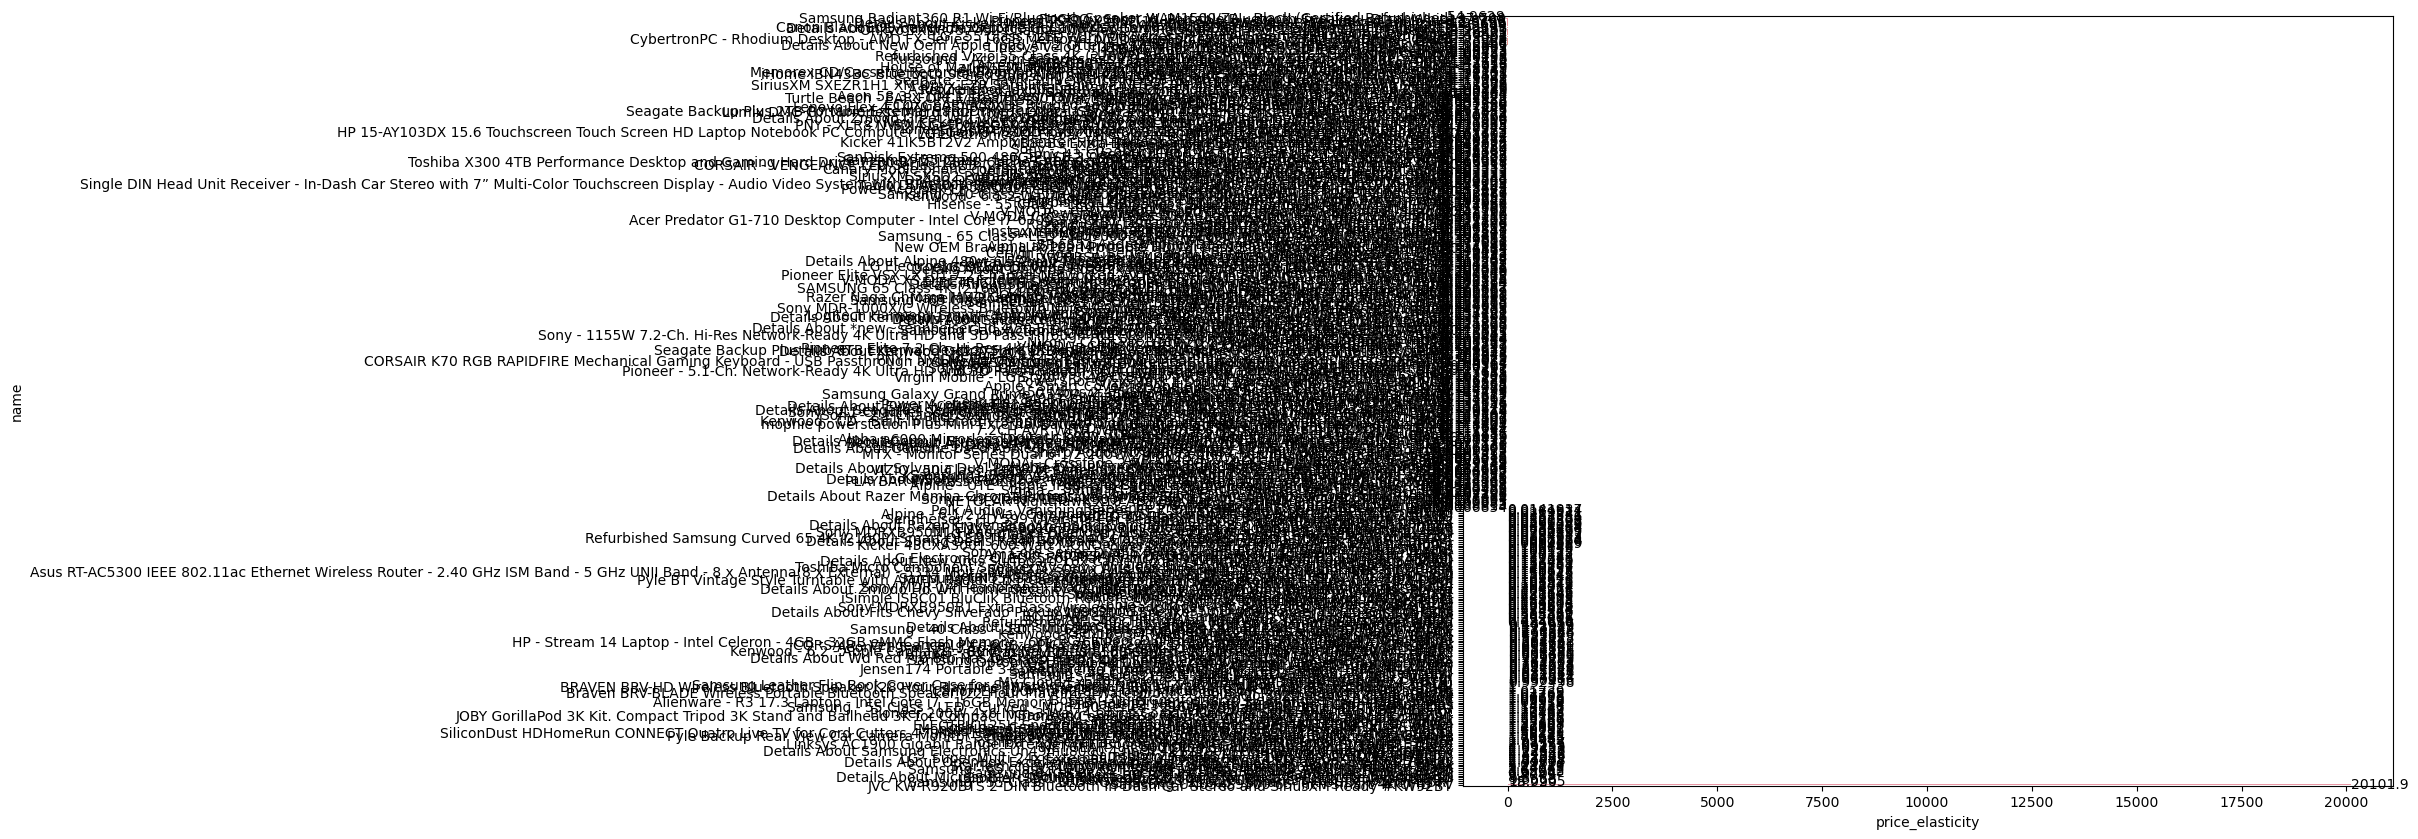

In [37]:
plt.figure(figsize=(12,10))
ax= sns.barplot(x=temp_df['price_elasticity'],y=temp_df['name'])
ax.bar_label(ax.containers[0])

# Feature Selection Methods

#### Forward Selection Method

In [26]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target

lr = LogisticRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select=3,direction="forward")

sfs.fit(X, y)

sfs.get_support()
sfs.transform(X).shape
print('Selected features:', sfs.get_support(indices=True))

Selected features: [0 2 3]


#### Backward Selection Method

In [27]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target

lr = LogisticRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select=2,direction="backward")

sfs.fit(X, y)

sfs.get_support()
sfs.transform(X).shape
print('Selected features:', sfs.get_support(indices=True))

Selected features: [2 3]


#### Based on P Value

In [28]:
from sklearn.feature_selection import f_regression

# load the Iris dataset
iris = load_iris()

# extract the features and target variable
X = iris.data
y = iris.target

# calculate the F-test statistic and p-value for each feature
f_test, p_values = f_regression(X, y)

# print the p-value of each feature
for i, p_value in enumerate(p_values):
    print(f"Feature {i+1}: p-value = {p_value:.4f}")


# if p < 0.05

Feature 1: p-value = 0.0000
Feature 2: p-value = 0.0000
Feature 3: p-value = 0.0000
Feature 4: p-value = 0.0000


#### Variance Inflastion Factor (VIF)

In [29]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# load the Iris dataset
iris = load_iris()

# extract the features and target variable
X = iris.data
y = iris.target
X =pd.DataFrame(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print results
print(vif)


   VIF Factor  features
0  262.969348         0
1   96.353292         1
2  172.960962         2
3   55.502060         3


In [30]:
# Feature with High VIF factor is likely to be highly correlated with the other features.

#### ANOVA F-value (p)

ANOVA (Analysis of Variance) F-value is used to evaluate the relevance of each feature to the target variable in a classification or regression task.

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

# load the Iris dataset
iris = load_iris()

# extract the features and target variable
X = iris.data
y = iris.target
X =pd.DataFrame(X)

# ANOVA  F-value 
selector  = SelectKBest(f_classif, k=3)

selector.fit(X, y)

# Print results
print('Selected features:', selector.get_support(indices=True))

Selected features: [0 2 3]


The negative sign in the formula for price elasticity of demand (PED) is used to indicate the inverse relationship between the price of a good or service and the quantity demanded by consumers. In other words, as the price of a good or service increases, the quantity demanded by consumers decreases, and vice versa.

The PED formula is:

PED = (% change in quantity demanded / % change in price)

By convention, the price elasticity of demand is expressed as a negative number, as the percentage change in quantity demanded and price usually have opposite signs. For example, if the price of a good increases by 10%, the quantity demanded may decrease by 5%, resulting in a PED of -0.5. The negative sign indicates that the demand for the good is responsive to changes in price and that the quantity demanded decreases as the price increases.

However, in some cases, the demand for a good may be inelastic, which means that the PED is less than 1. In this case, the percentage change in quantity demanded may be smaller than the percentage change in price, resulting in a positive PED value. But, in general, the negative sign is used to indicate the inverse relationship between price and quantity demanded.